In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_2284/3246493913.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('BRSM_Assignment_Datasets.csv')
print(df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

## Is there any effect of Working Day on the number of electric cycles rented ?

[]

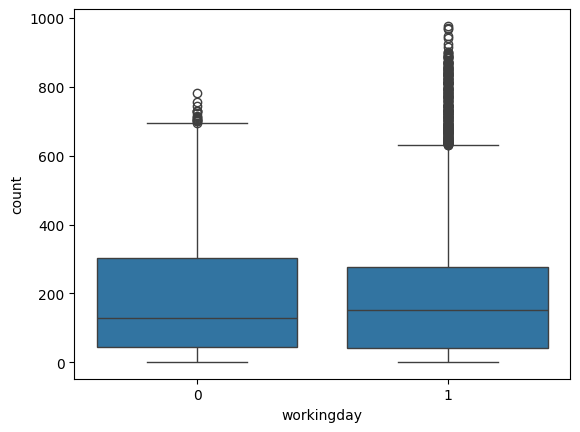

In [5]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

***Visual Tests to know if the samples follow normal distribution***

[]

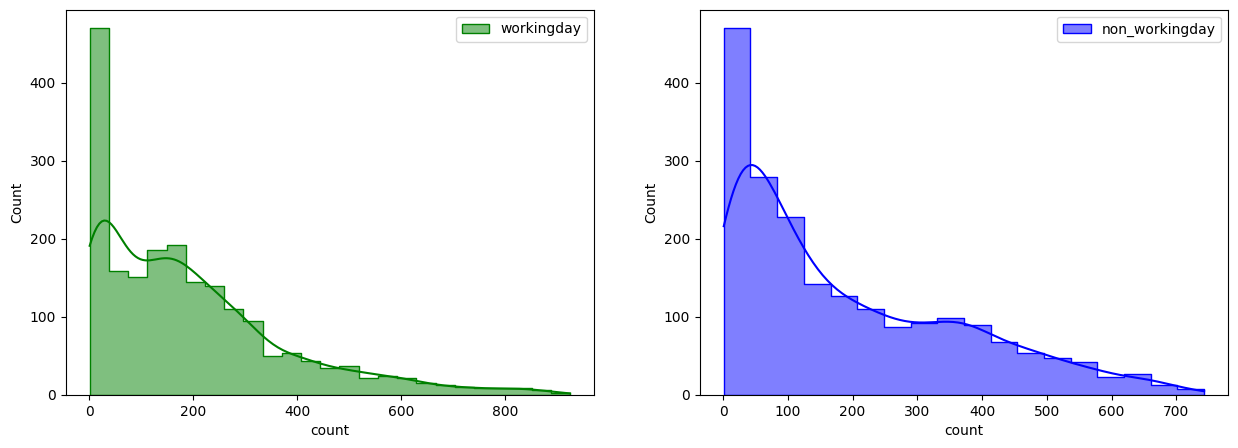

In [6]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), 
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), 
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

***Distribution check using QQ Plot***

[]

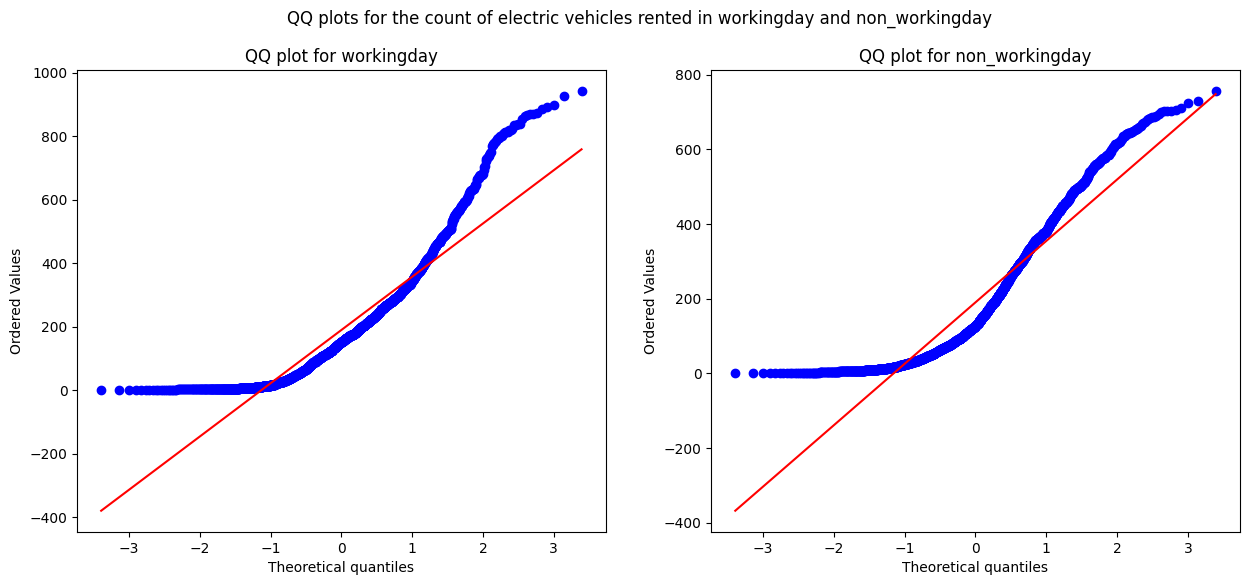

In [7]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
stats.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
stats.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Shapiro-Wilk Test for Normality***

In [9]:
test_stat, p_value = stats.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('Workingday sample')
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  


print() 

print('Non-workingday sample')
test_stat, p_value = stats.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

Workingday sample
p-value 3.8226265068719226e-38
The sample does not follow normal distribution

Non-workingday sample
p-value 1.6705838150705885e-36
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [13]:
print('Workingday sample')
transformed_workingday = stats.boxcox(df.loc[df['workingday'] == 1, 'count'].sample(5000,replace=True))[0]
test_stat, p_value = stats.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

print()
print('Non-workingday sample')
transformed_non_workingday = stats.boxcox(df.loc[df['workingday'] == 0, 'count'].sample(5000,replace=True))[0]
test_stat, p_value = stats.shapiro(transformed_non_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

Workingday sample
p-value 5.8570572580339254e-28
The sample does not follow normal distribution

Non-workingday sample
p-value 8.345713671422115e-29
The sample does not follow normal distribution


***Mann-Whitney U rank Test***

In [25]:
test_stat, p_value = stats.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'], 
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


##### Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

### Is there any effect of holidays on the number of electric cycles rented ?

[]

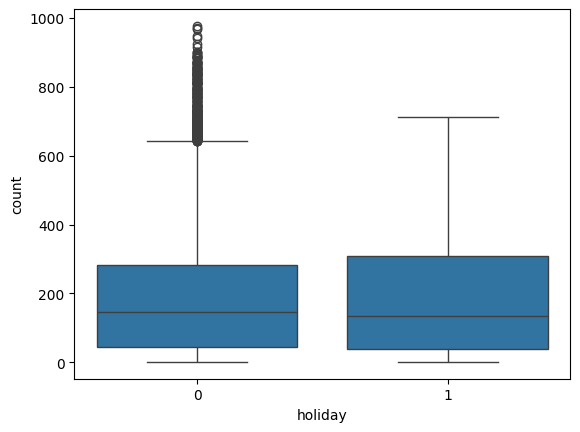

In [14]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

[]

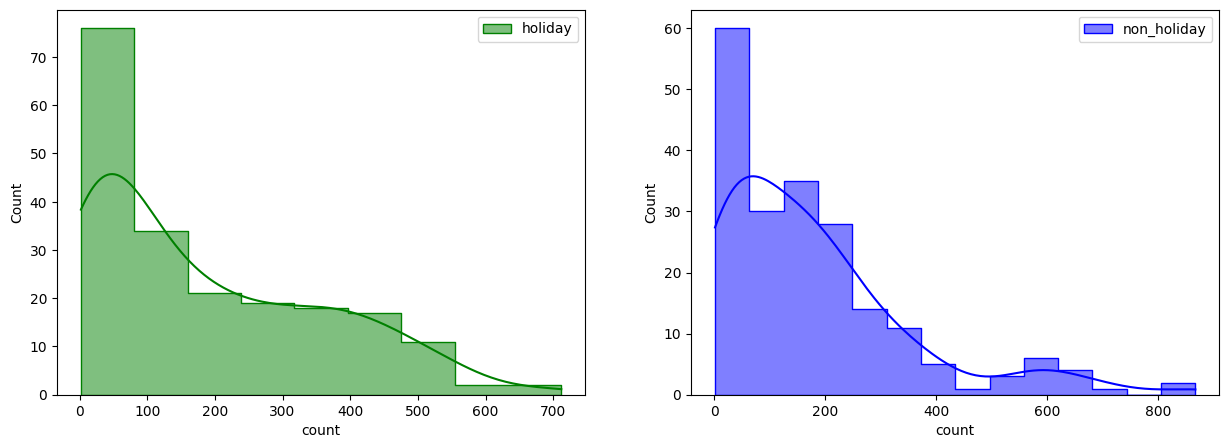

In [15]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200), 
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200), 
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

[]

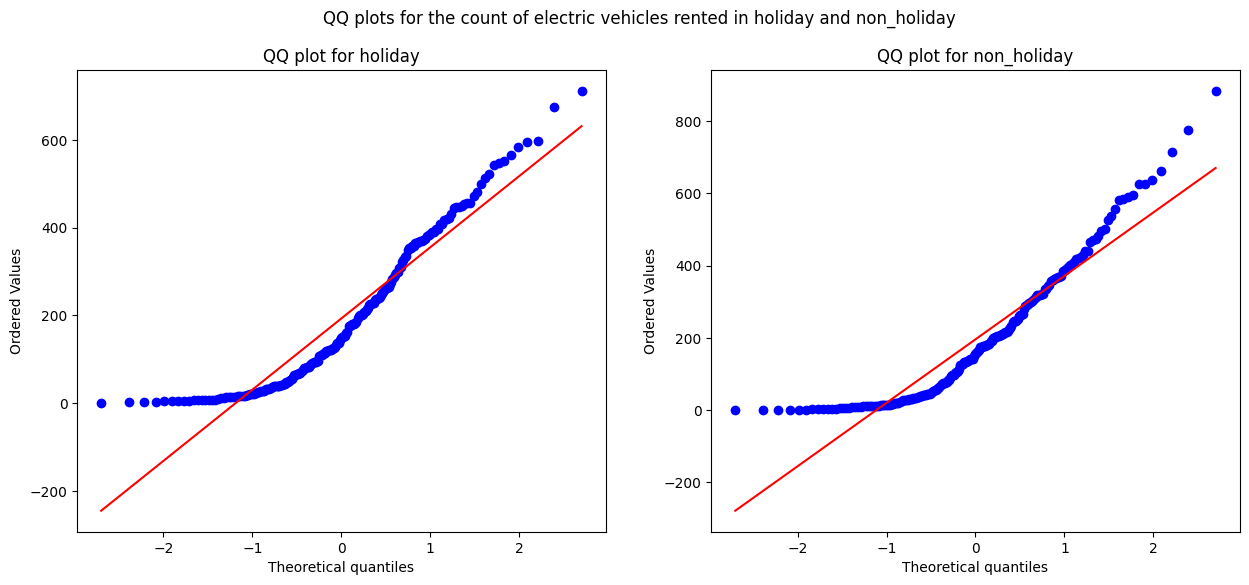

In [17]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
stats.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
stats.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()

In [22]:
print('Holiday sample')
test_stat, p_value = stats.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

print()

print('Non-holiday sample')
test_stat, p_value = stats.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  


Holiday sample
p-value 1.0453687293451126e-11
The sample does not follow normal distribution

Non-holiday sample
p-value 1.321091000935371e-12
The sample does not follow normal distribution


In [21]:
print("Holiday sample")
transformed_holiday = stats.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = stats.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

print()
print("Non-holiday sample")
transformed_non_holiday = stats.boxcox(df.loc[df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = stats.shapiro(transformed_non_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

Holiday sample
p-value 2.134933458313291e-07
The sample does not follow normal distribution

Non-holiday sample
p-value 3.776770389651481e-26
The sample does not follow normal distribution


In [33]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = stats.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.9613672207745892
No.of electric cycles rented is similar for holidays and non-holidays


##### Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays. 